In [2]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/library.R", local = T)
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)

In [4]:
data <- data.table::fread(file = "tidy_data_wide.csv")

In [6]:
table(data$experiment)


           1hr STM          20min STM 20min STM unpaired           24hr LTM 
                26                142                 41                189 
      24hr LTM CHX     24hr LTM GTACR            3hr STM 
                59                 45                 39 

In [9]:
panel6_data <- data[experiment=="24hr LTM GTACR",]

In [14]:
panel6_data[, .(Files, Genotype, interactor, `comment on SD`)]

Files,Genotype,interactor,comment on SD
<chr>,<chr>,<chr>,<chr>
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5
2023-06-13_15-41-34(ESB-GTACR2),Iso31,StaticSleepStimulator,4.5


In [13]:
colnames(panel6_data)

[1] "Files"              "sheet"              "Genotype"          
 [4] "ROI"                "User"               "fly_name_reference"
 [7] "Gender"             "Age"                "ATR"               
[10] "Training"           "Odor"               "Sugar"             
[13] "Electric shock"     "PRE"                "PRE_1"             
[16] "PRE_2"              "POST"               "POST_1"            
[19] "POST_2"             "Keep"               "interactor"        
[22] "comment on SD"      "experiment"         "row_number"        
[25] "region_id"          "folder__"           "sheet__"           
[28] "idoc_folder"        "PRE_manual"         "POST_manual"       
[31] "PRE_n_exits"        "PRE_files"          "PRE_1_manual"      
[34] "PRE_2_manual"       "POST_n_exits"       "POST_files"        
[37] "POST_1_manual"      "POST_2_manual"      "PRE_machine"       
[40] "PRE_1_machine"      "PRE_2_machine"      "POST_machine"      
[43] "POST_1_machine"     "POST_2_machine"     "SD_status"         
[46] "interval"           "id"

In [749]:
options(repr.plot.width=5, repr.plot.height=5)
panel6A <- learning_plot(panel6A_data, "Iso31", map_signif_level=TRUE, test=paired_t_test)

Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


In [750]:
options(repr.plot.width=15, repr.plot.height=5)
panel6B <- sleep_plot(data=panel6A_data[test=="POST"],  "Iso31", color_by_group = F)
# Define rectangle coordinates
rect_xmin <- 5*3600
rect_xmax <- 11*3600
rect_ymin <- 1
rect_ymax <- 1.1
panel6B <- panel6B + 
    geom_rect(
        mapping=aes(
            xmin = rect_xmin, 
            xmax = rect_xmax, 
            ymin = rect_ymin, 
            ymax = rect_ymax
        ), fill = "blue", alpha = 1)  # alpha for transparency

Warning message in melt.data.table(data = data[test == "POST", ], id.vars = c("fly_name_reference", :
“'measure.vars' [ZT4, ZT4.5, ZT5, ZT5.5, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”
Warning message in melt.data.table(data = data[test == "POST", ], id.vars = c("fly_name_reference", :
“'measure.vars' [ZT4_interactions, ZT4.5_interactions, ZT5_interactions, ZT5.5_interactions, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


[1] 0.1


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


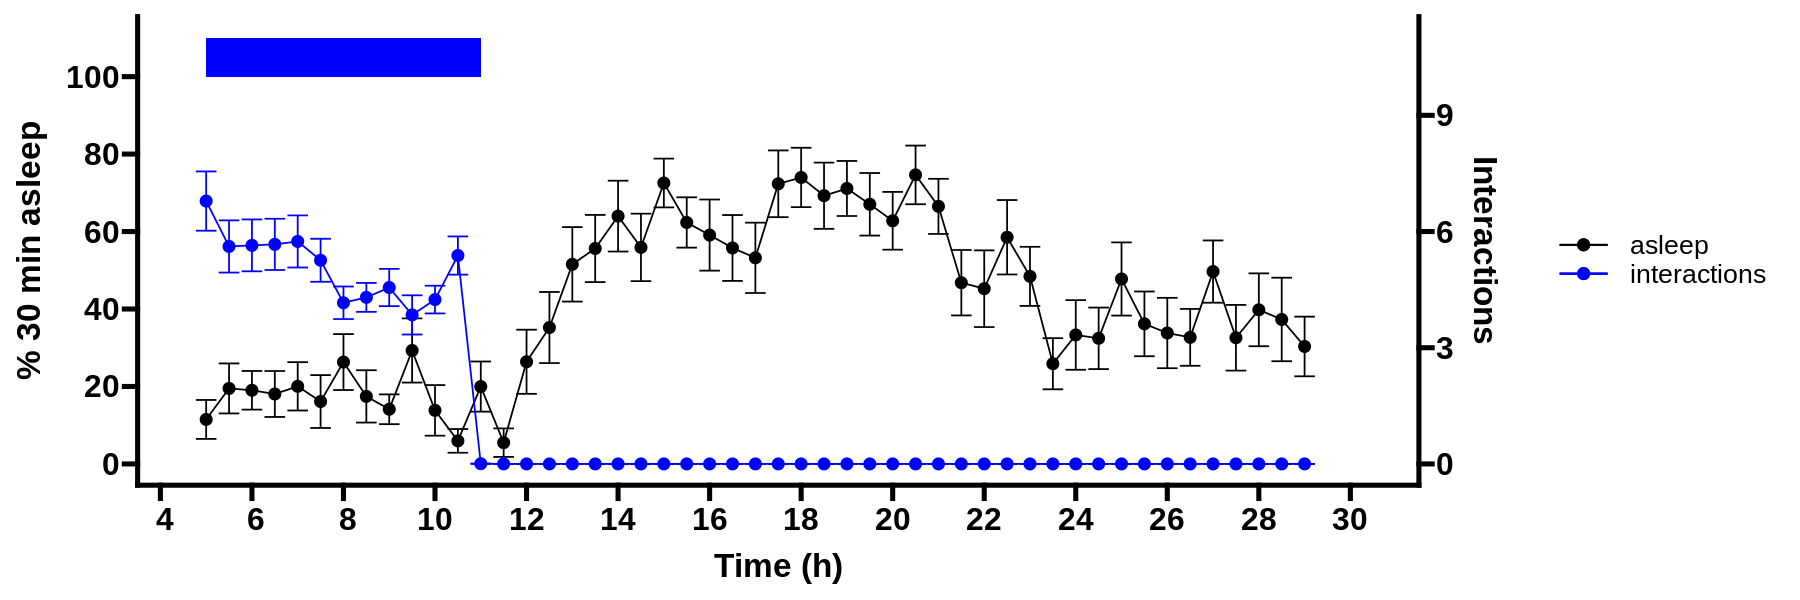

In [751]:
panel6B

In [752]:
genotype <- "alph_prime_beta_prime_KCs>GTACR2"
new_genotype <- "α'β' KCs>GTACR"

In [753]:
panel6_data[Genotype == genotype, Genotype := new_genotype]
genotype <- new_genotype

In [754]:
panel6_data[, table(experiment)]

experiment
LTM GTACR Blue 3.5 SleepStimulator   LTM GTACR Blue 4 SleepStimulator 
                                24                                 34 
LTM GTACR Blue 4.5 SleepStimulator 
                                36 

In [762]:
panel6C_data <- panel6_data[Genotype == genotype & experiment %in% c(
    # "LTM GTACR Blue 3.5 SleepStimulator",
    "LTM GTACR Blue 4 SleepStimulator",
    "LTM GTACR Blue 4.5 SleepStimulator"
), ]

In [763]:
options(repr.plot.width=5, repr.plot.height=5)
panel6C <- learning_plot(panel6C_data, genotype, map_signif_level=TRUE, test=paired_t_test)

Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


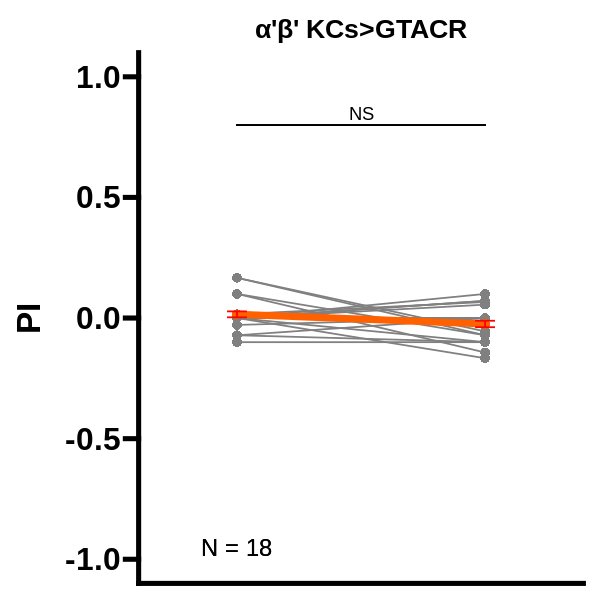

In [764]:
panel6C

Warning message in melt.data.table(data = data[test == "POST", ], id.vars = c("fly_name_reference", :
“'measure.vars' [ZT4, ZT4.5, ZT5, ZT5.5, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”
Warning message in melt.data.table(data = data[test == "POST", ], id.vars = c("fly_name_reference", :
“'measure.vars' [ZT4_interactions, ZT4.5_interactions, ZT5_interactions, ZT5.5_interactions, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


[1] 0.1


Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


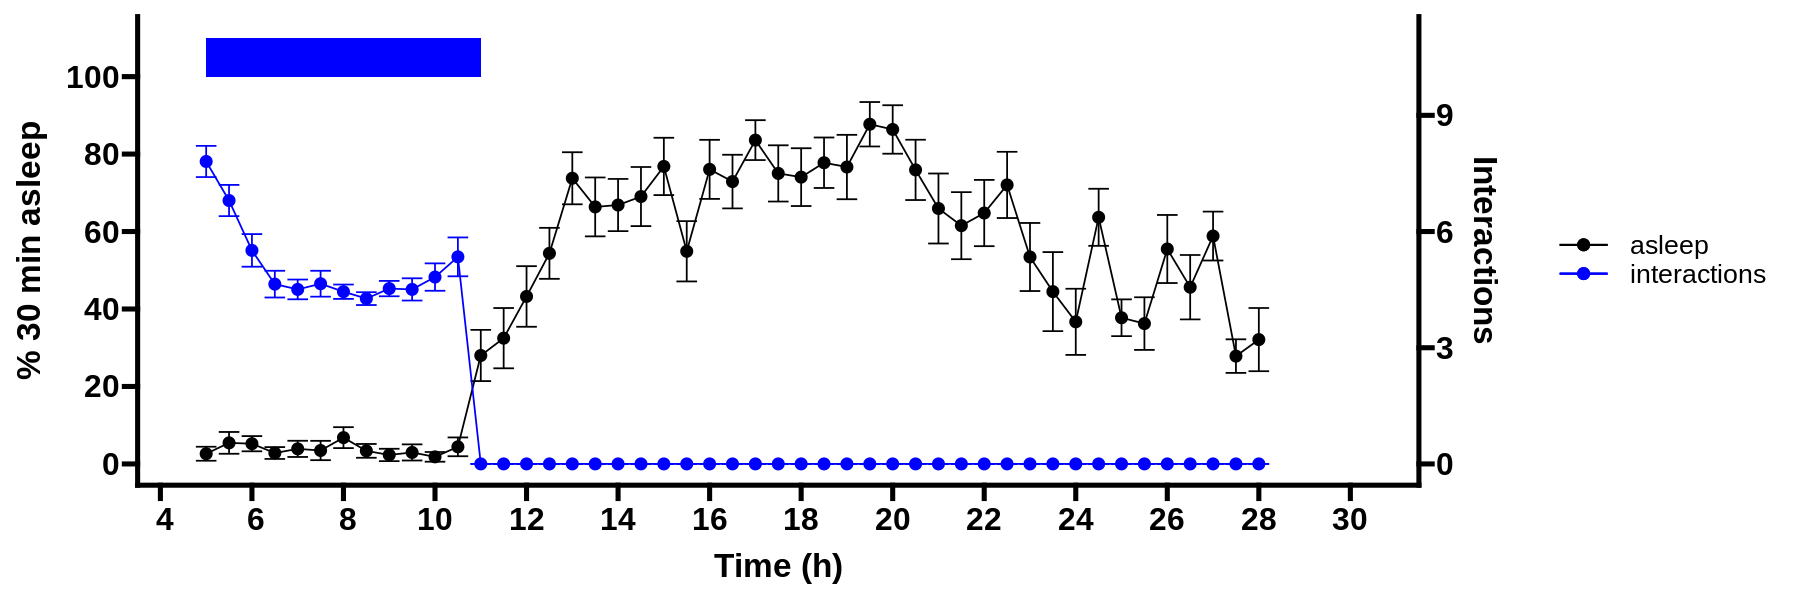

In [765]:
options(repr.plot.width=15, repr.plot.height=5)
panel6D <- sleep_plot(data=panel6C_data[test=="POST"],  "Iso31", color_by_group = F)
# Define rectangle coordinates
rect_xmin <- 5*3600
rect_xmax <- 11*3600
rect_ymin <- 1
rect_ymax <- 1.1
panel6D <- panel6D + 
    geom_rect(
        mapping=aes(
            xmin = rect_xmin, 
            xmax = rect_xmax, 
            ymin = rect_ymin, 
            ymax = rect_ymax
        ), fill = "blue", alpha = 1)  # alpha for transparency
panel6D

In [766]:
ggsave(filename = "figures/panel6A.svg", plot = panel6A, width=5, height=5)
ggsave(filename = "figures/panel6C.svg", plot = panel6C, width=5, height=5)

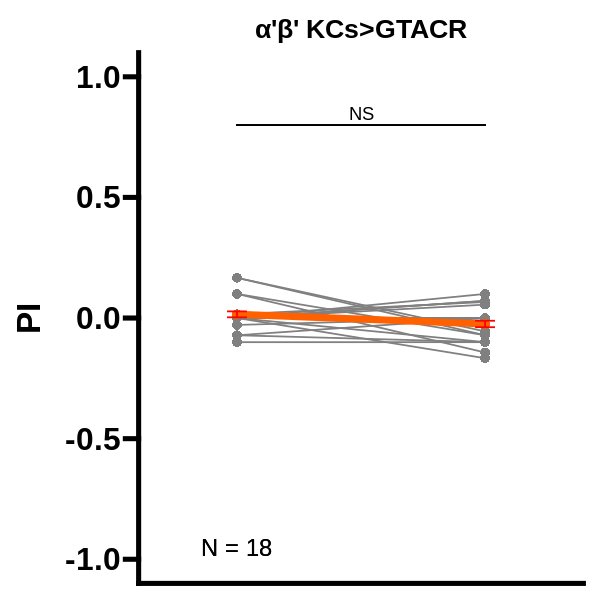

In [767]:
options(repr.plot.width=5, repr.plot.height=5)
panel6C

In [761]:
ggsave(filename = "figures/panel6B.svg", plot = panel6B, width=15, height=5)
ggsave(filename = "figures/panel6D.svg", plot = panel6D, width=15, height=5)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


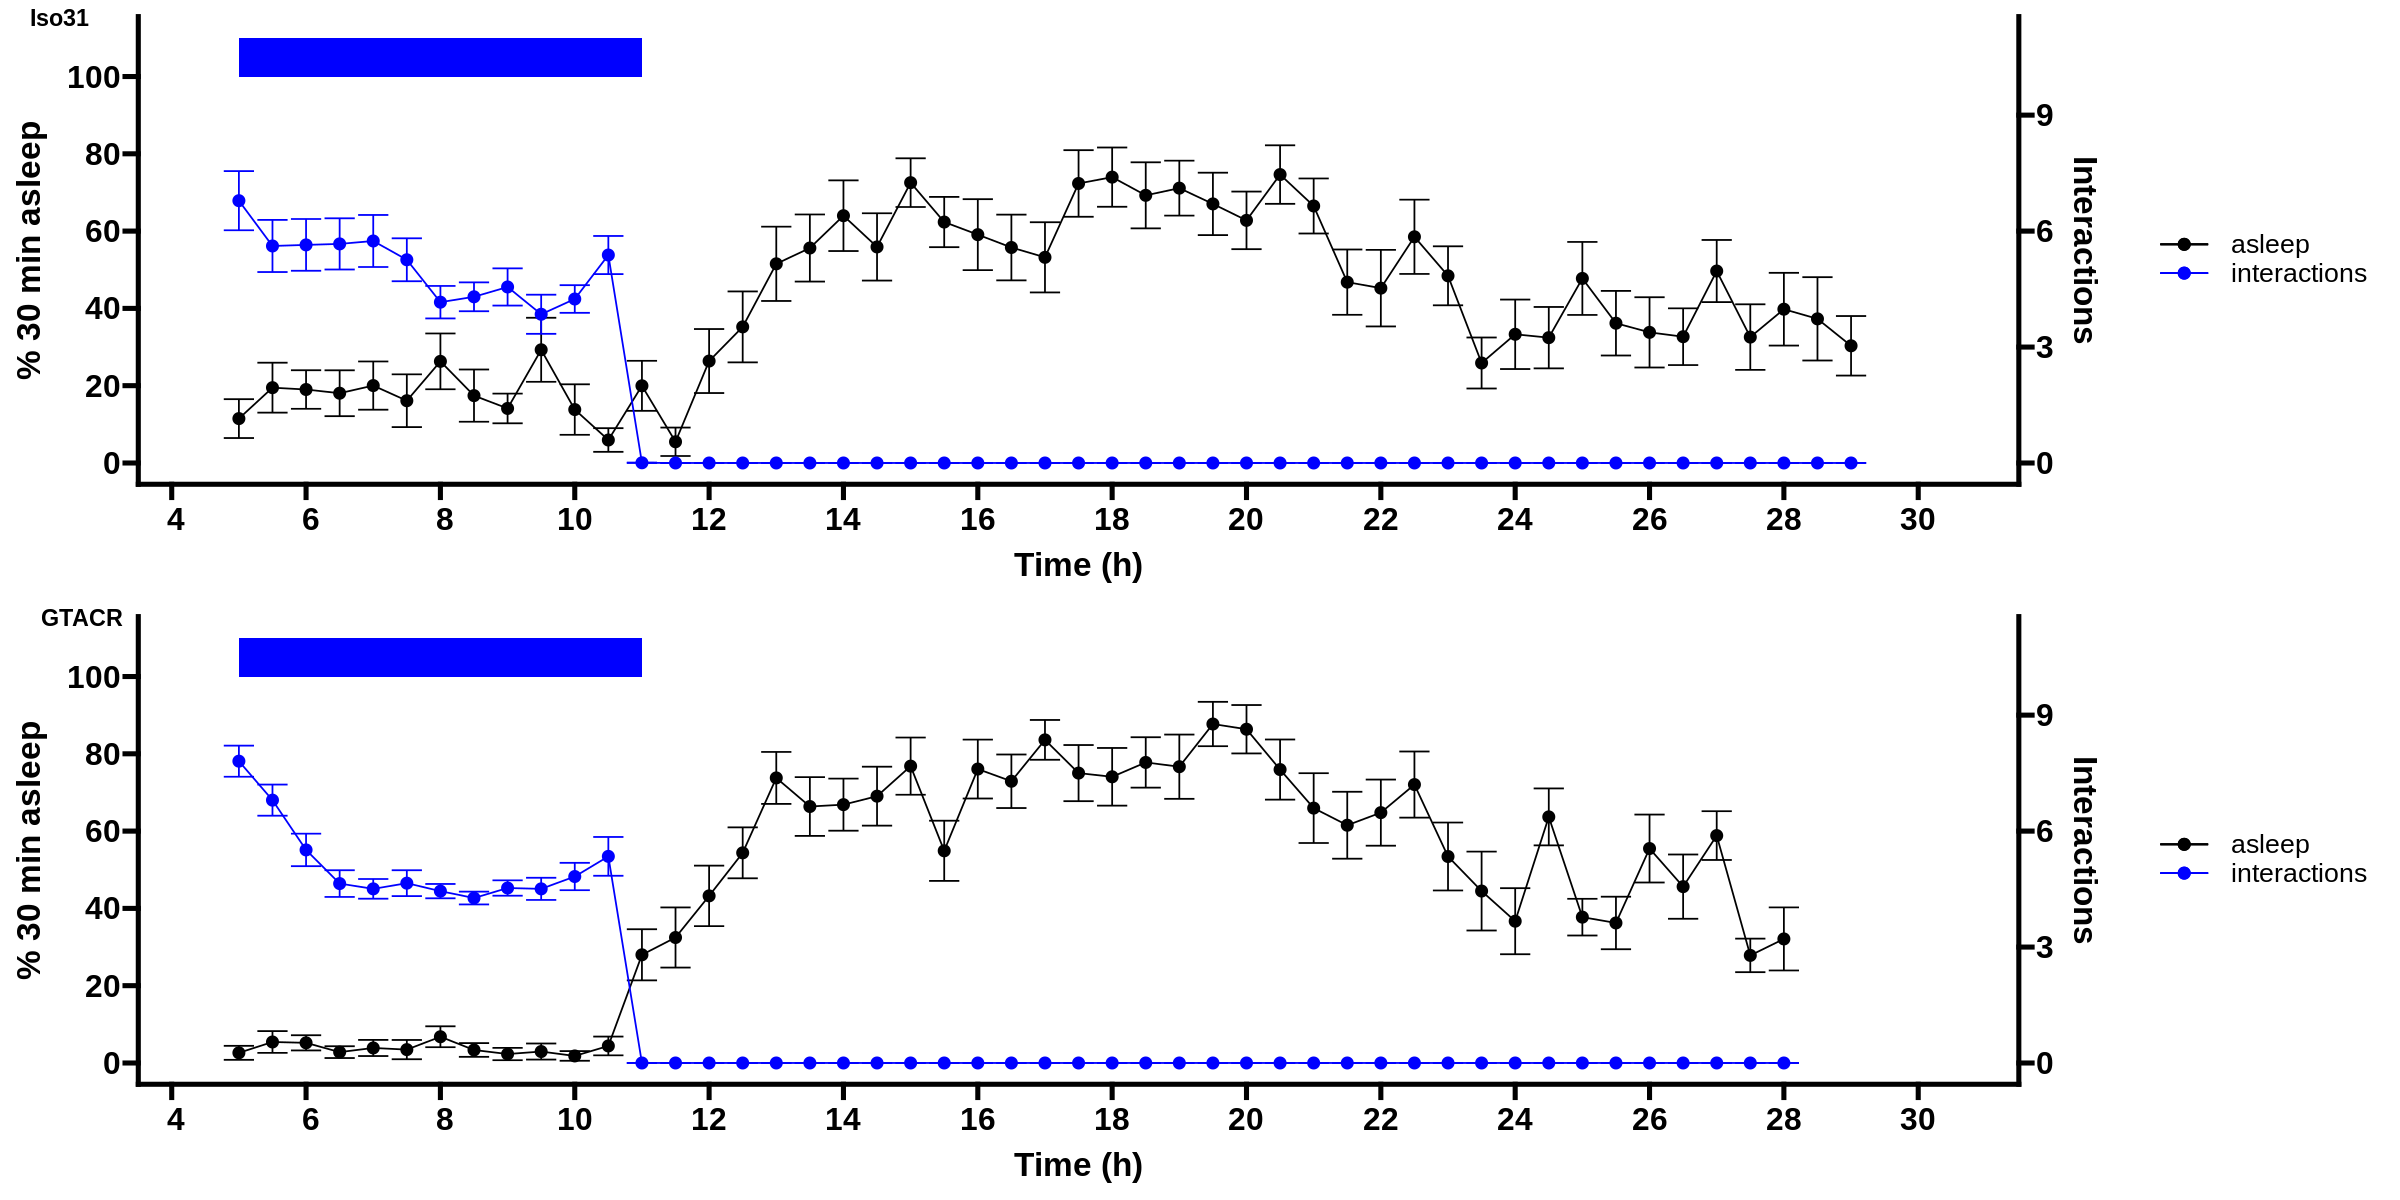

In [772]:
options(repr.plot.width=20, repr.plot.height=10)
cowplot::plot_grid(panel6B, panel6D, nrow=2, labels=c("Iso31", "GTACR"))